In [13]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd

2020.03.6


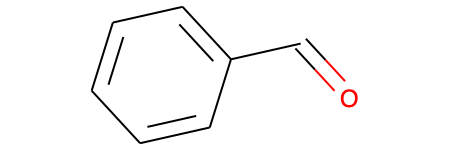

In [36]:
mol=Chem.MolFromSmiles('C1=CC=C(C=C1)C=O')
mol

In [11]:
descriptor_names = [x[0] for x in Descriptors._descList]
descriptor_names

['MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_VSA8',
 'SMR_VSA9',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA12',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_V

In [15]:
descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
descriptors = pd.DataFrame(
    [descriptor_calculator.CalcDescriptors(mol)],
    columns=descriptor_names
)
X = descriptors
X.shape

(1, 200)

In [16]:
X

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,10.006481,0.729167,10.006481,0.729167,0.495636,106.124,100.076,106.041865,40,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
logp=Descriptors.MolLogP(mol)
logp

1.4990999999999999

In [19]:
from mordred import Calculator, descriptors
calc = Calculator(descriptors, ignore_3D=True)

In [23]:
from mordred import Calculator, descriptors
calc = Calculator(descriptors, ignore_3D=True)
X_mord = pd.DataFrame(calc.pandas([mol]))
X_mord

100%|██████████| 1/1 [00:00<00:00,  9.31it/s]


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,5.656854,5.42766,0,0,10.424292,2.135779,4.271558,10.424292,1.303037,2.969338,...,8.298291,35.247635,106.041865,7.574419,64,7,34.0,36.0,2.611111,2.0


In [34]:
descriptors_mord = {}
for i, desc in enumerate(calc.descriptors):
    descriptors_mord[desc.__str__()] = desc
descriptors_mord

{'ABC': mordred.ABCIndex.ABCIndex(),
 'ABCGG': mordred.ABCIndex.ABCGGIndex(),
 'nAcid': mordred.AcidBase.AcidicGroupCount(),
 'nBase': mordred.AcidBase.BasicGroupCount(),
 'SpAbs_A': mordred.AdjacencyMatrix.AdjacencyMatrix('SpAbs'),
 'SpMax_A': mordred.AdjacencyMatrix.AdjacencyMatrix('SpMax'),
 'SpDiam_A': mordred.AdjacencyMatrix.AdjacencyMatrix('SpDiam'),
 'SpAD_A': mordred.AdjacencyMatrix.AdjacencyMatrix('SpAD'),
 'SpMAD_A': mordred.AdjacencyMatrix.AdjacencyMatrix('SpMAD'),
 'LogEE_A': mordred.AdjacencyMatrix.AdjacencyMatrix('LogEE'),
 'VE1_A': mordred.AdjacencyMatrix.AdjacencyMatrix('VE1'),
 'VE2_A': mordred.AdjacencyMatrix.AdjacencyMatrix('VE2'),
 'VE3_A': mordred.AdjacencyMatrix.AdjacencyMatrix('VE3'),
 'VR1_A': mordred.AdjacencyMatrix.AdjacencyMatrix('VR1'),
 'VR2_A': mordred.AdjacencyMatrix.AdjacencyMatrix('VR2'),
 'VR3_A': mordred.AdjacencyMatrix.AdjacencyMatrix('VR3'),
 'nAromAtom': mordred.Aromatic.AromaticAtomsCount(),
 'nAromBond': mordred.Aromatic.AromaticBondsCount(),
 'n

In [30]:
descriptors_mord['ABC']

mordred.ABCIndex.ABCIndex()

In [37]:
result = descriptors_mord["ABC"](mol)
result

5.6568542494923815